# U.S. Medical Insurance Costs

Import csv into a Pandas dataset

In [2]:
import pandas as pd

insurance_data = pd.read_csv('insurance.csv')

Look at dataset

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance_data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [5]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Convert 'Smoker' to a boolean

In [7]:
insurance_data['smoker'] = insurance_data['smoker'].replace({'yes': True, 'no': False})

#verify change
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   bool   
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(2)
memory usage: 64.2+ KB


Identify relationships between the Cost of insurance and other variables in the datasets

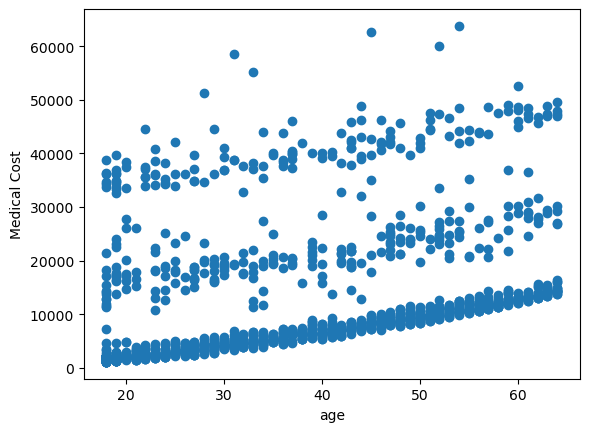

Pearson Correlation: 0.3


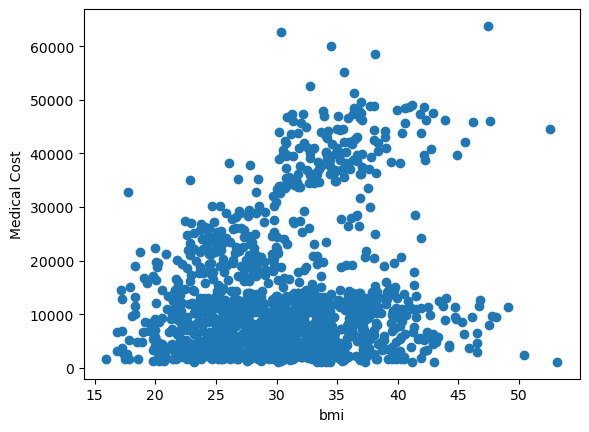

Pearson Correlation: 0.2


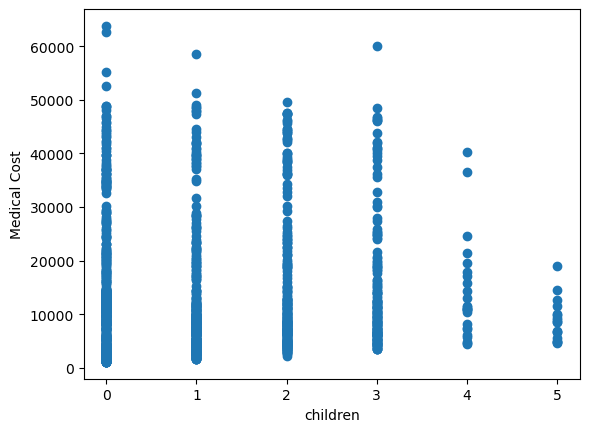

Pearson Correlation: 0.1


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

for col in insurance_data.columns:
    if col == 'charges':
        continue
    if insurance_data[col].dtype == 'int64' or insurance_data[col].dtype == 'float64':
        plt.scatter(x=insurance_data[col], y=insurance_data['charges'])
        plt.xlabel(col)
        plt.ylabel('Medical Cost')
        plt.show()

        corr, p = pearsonr(insurance_data[col], insurance_data['charges'])
        print(f'Pearson Correlation: {round(corr, 1)}')